# Initialization

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# Transmon qubit

The transmon qubit and the Cooper pair box are described by the Hamiltonian 
\begin{equation}
H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2+\frac{1}{2}E_\text{J}\sum_n(|n\rangle\langle n+1|+\text{h.c.}),
\end{equation}
expressed in the charge basis. Here,  $E_C$ is the charging energy, $E_J$ the Josephson energy, and $n_g$ the offset charge. Internal representation of the Hamiltonian proceeds via the charge basis with charge-number cutoff specified by `ncut`, which must be chosen sufficiently large for convergence.

An instance of the transmon qubit is initialized as follows:

In [2]:
tmon = scq.Transmon(
    EJ=30.02,
    EC=1.2,
    ng=0.3,
    ncut=31
)

Or, alternatively, we can use the graphical user interface (if the `ipywidgets` package is installed)

In [8]:
tmon = scq.Transmon.create()

Output()

## Calculating and plotting energy levels and eigenfunctions

The energy eigenvalues of the transmon Hamiltonian for the given set of model parameters are obtained by calling the `eigenvals()` method. The optional parameter `evals_count` specifies the sought number of eigenenergies.

In [9]:
tmon.eigenvals(evals_count=12)

array([-21.82674091,  -6.15959855,   7.94124586,  20.84080224,
        28.09898516,  45.79505843,  46.25965954,  78.30745776,
        78.31056405, 120.95203447, 120.95204064, 173.4572327 ])

To plot eigenenergies as a function of one of the qubit parameters (`EJ`, `EC`, or `ng`), we generate an array of values for the desired parameter and call the method `plot_evals_vs_paramvals`:

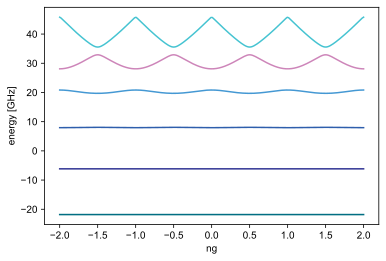

In [10]:
ng_list = np.linspace(-2, 2, 220)
tmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=6, subtract_ground=False);

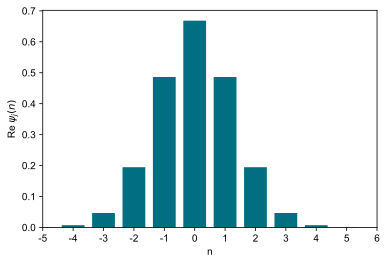

In [11]:
tmon.plot_n_wavefunction(esys=None, which=0, mode='real');

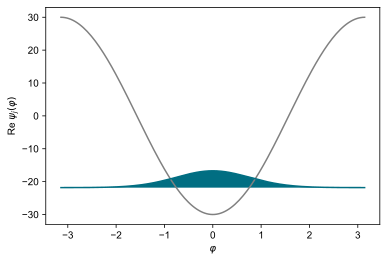

In [12]:
tmon.plot_wavefunction(esys=None, which=0, mode='real');

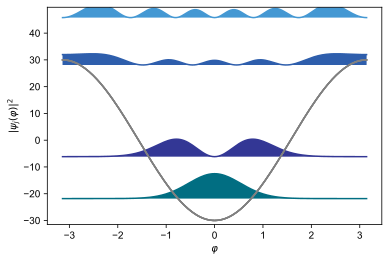

In [13]:
tmon.plot_phi_wavefunction(which=[0, 1, 4, 5], mode='abs_sqr');

## Calculating and visualizing matrix elements

Matrix elements can be calculated by referring to the `Transmon` operator methods in string form. For instance, `.n_operator` yields the charge operator:

In [7]:
tmon.matrixelement_table('n_operator', evals_count=3)

array([[ 0.2999574 , -0.90286728, -0.00126536],
       [-0.90286728,  0.30195231, -1.21191324],
       [-0.00126536, -1.21191324,  0.26241099]])

Visualizing matrix elements is accomplished by calling the `.plot_matrixelements` method:

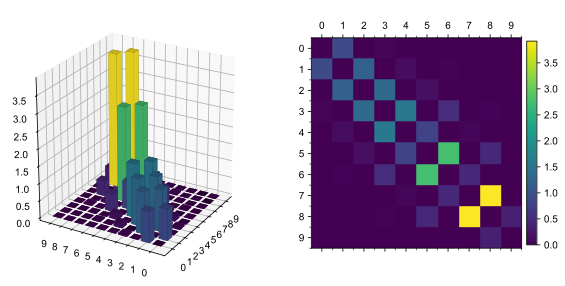

In [14]:
tmon.plot_matrixelements('n_operator', evals_count=10);

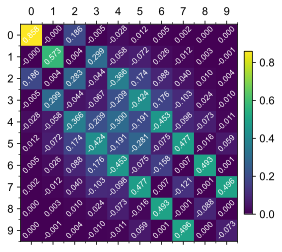

In [4]:
tmon.plot_matrixelements('cos_phi_operator', evals_count=10, show3d=False, show_numbers=True);

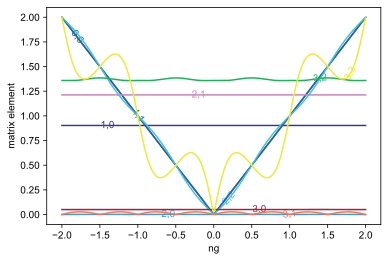

In [11]:
fig, ax = tmon.plot_matelem_vs_paramvals('n_operator', 'ng', ng_list, select_elems=4, filename='./data/test');

## Tunable Transmon

An important modification of the transmon qubit is the replacement of the Josephson junction by a SQUID loop of two Josephson junctions. A flux threaded through this loop can then be used to change the effective Josephson energy of the circuit and thus make the transmon tunable. The resulting Hamiltonian is 
\begin{equation}
H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2+\frac{1}{2}E_\text{J,eff}(\Phi_\text{ext})\sum_n(|n\rangle\langle n+1|+\text{h.c.}),
\end{equation}
expressed in the charge basis. Here,  parameters are as above except for the effective Josephson energy $E_\text{J,eff}(\Phi_\text{ext}) = E_{\text{J,max}} \sqrt{\cos^2(\pi\Phi_\text{ext}/\Phi_0)+ d^2 \sin^2 (\pi\Phi_\text{ext}/\Phi_0)}$, where $E_\text{J,max} = E_\text{J1} + E_\text{J2}$ is the maximum Josephson energy, and $d=(E_\text{J1}-E_\text{J2})/(E_\text{J1}+E_\text{J2})$ is the relative junction asymmetry.

An instance of a tunable transmon qubit is obtained like this:

In [19]:
tune_tmon = scq.TunableTransmon(
    EJmax=50.0,
    EC=0.5,
    d=0.01,
    flux=0.0,
    ng=0.0,
    ncut=30
)

Alternatively, the `.create` method can again be used if `ipywidgets` is available:

In [20]:
tune_tmon = scq.TunableTransmon.create()

Output()

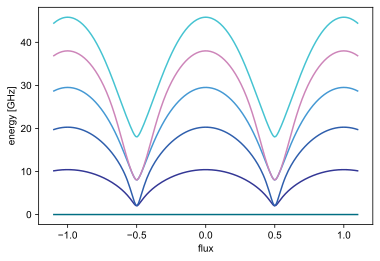

In [23]:
flux_list = np.linspace(-1.1, 1.1, 220)
tune_tmon.plot_evals_vs_paramvals('flux', flux_list, subtract_ground=True);